## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [ ]:
df = pd.read_csv('/content/data.csv')

## EDA and Feature Engineering

In [ ]:
df.head(3)

WTGID  Loc  MonthStartDate  f1           f2         f3         f4  \
0      1    0   1/1/2023 0:00  18   957.789366  20.874546  68.134813   
1      1    0   3/1/2023 0:00  14   660.384368  15.092427  65.742906   
2      1    0  10/1/2023 0:00  21  1210.950000  21.302701  66.728678   

          f5         f6  target Dataset  
0  70.717770  49.843224       0   model  
1  68.528330  53.435904       2   model  
2  69.232881  47.930180       2     val

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WTGID           2820 non-null   int64  
 1   Loc             2820 non-null   int64  
 2   MonthStartDate  2820 non-null   object 
 3   f1              2820 non-null   int64  
 4   f2              2820 non-null   float64
 5   f3              2820 non-null   float64
 6   f4              2820 non-null   float64
 7   f5              2820 non-null   float64
 8   f6              2820 non-null   float64
 9   target          2820 non-null   int64  
 10  Dataset         2820 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 242.5+ KB


In [ ]:
df1 = df.copy()
df1.drop(['MonthStartDate','Dataset'],axis=1,inplace=True)
df1.corr()

WTGID       Loc        f1        f2        f3        f4        f5  \
WTGID   1.000000  0.034182  0.017065 -0.040475 -0.088163  0.084385  0.071490   
Loc     0.034182  1.000000  0.365937  0.204213  0.320323  0.321758  0.309555   
f1      0.017065  0.365937  1.000000  0.054668  0.836823  0.579921  0.541918   
f2     -0.040475  0.204213  0.054668  1.000000  0.024391  0.109901  0.110504   
f3     -0.088163  0.320323  0.836823  0.024391  1.000000  0.570278  0.526217   
f4      0.084385  0.321758  0.579921  0.109901  0.570278  1.000000  0.982203   
f5      0.071490  0.309555  0.541918  0.110504  0.526217  0.982203  1.000000   
f6      0.163242  0.008818 -0.258967  0.092536 -0.437809  0.471510  0.534139   
target -0.026732  0.118511  0.080514  0.066290  0.074970  0.426322  0.442400   

              f6    target  
WTGID   0.163242 -0.026732  
Loc     0.008818  0.118511  
f1     -0.258967  0.080514  
f2      0.092536  0.066290  
f3     -0.437809  0.074970  
f4      0.471510  0.426322  
f5      0.534139  0.442400  
f6      1.000000  0.393216  
target  0.393216  1.000000

Obervations:

Features f1 and f3 are highly positively correlated
Features f4 and f5 are highly positively correlated

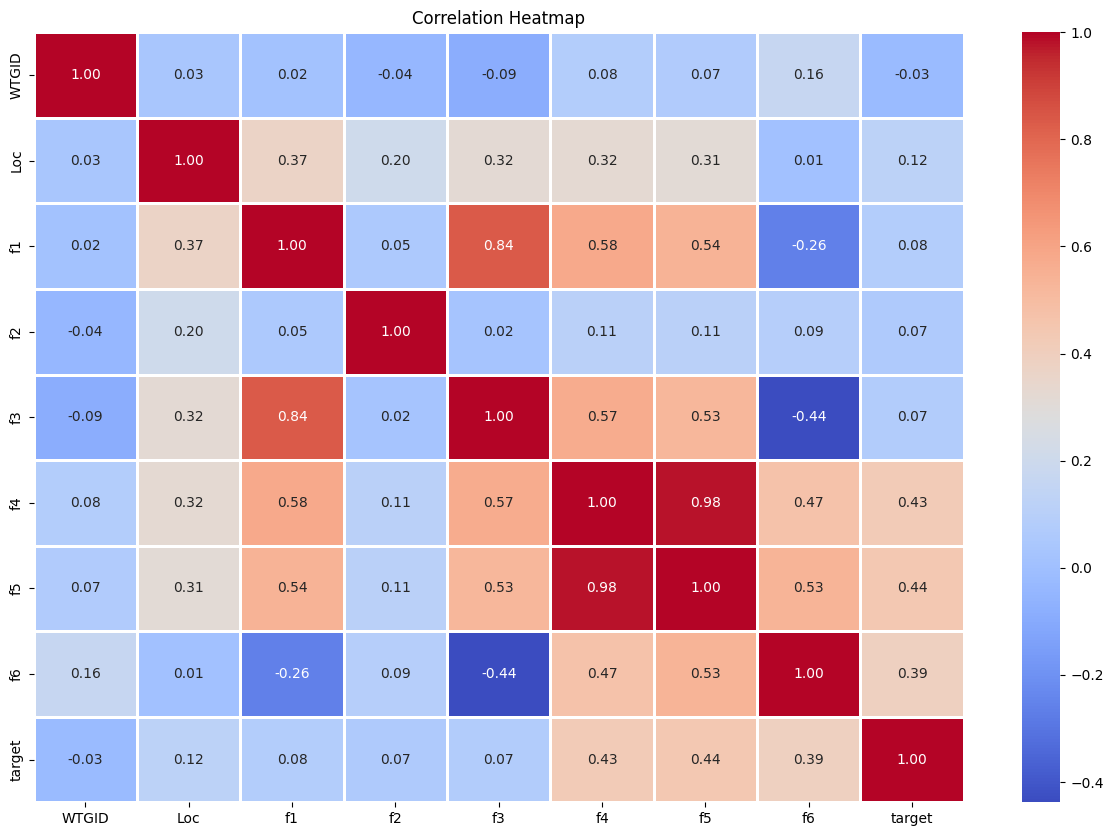

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),fmt='.2f',annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

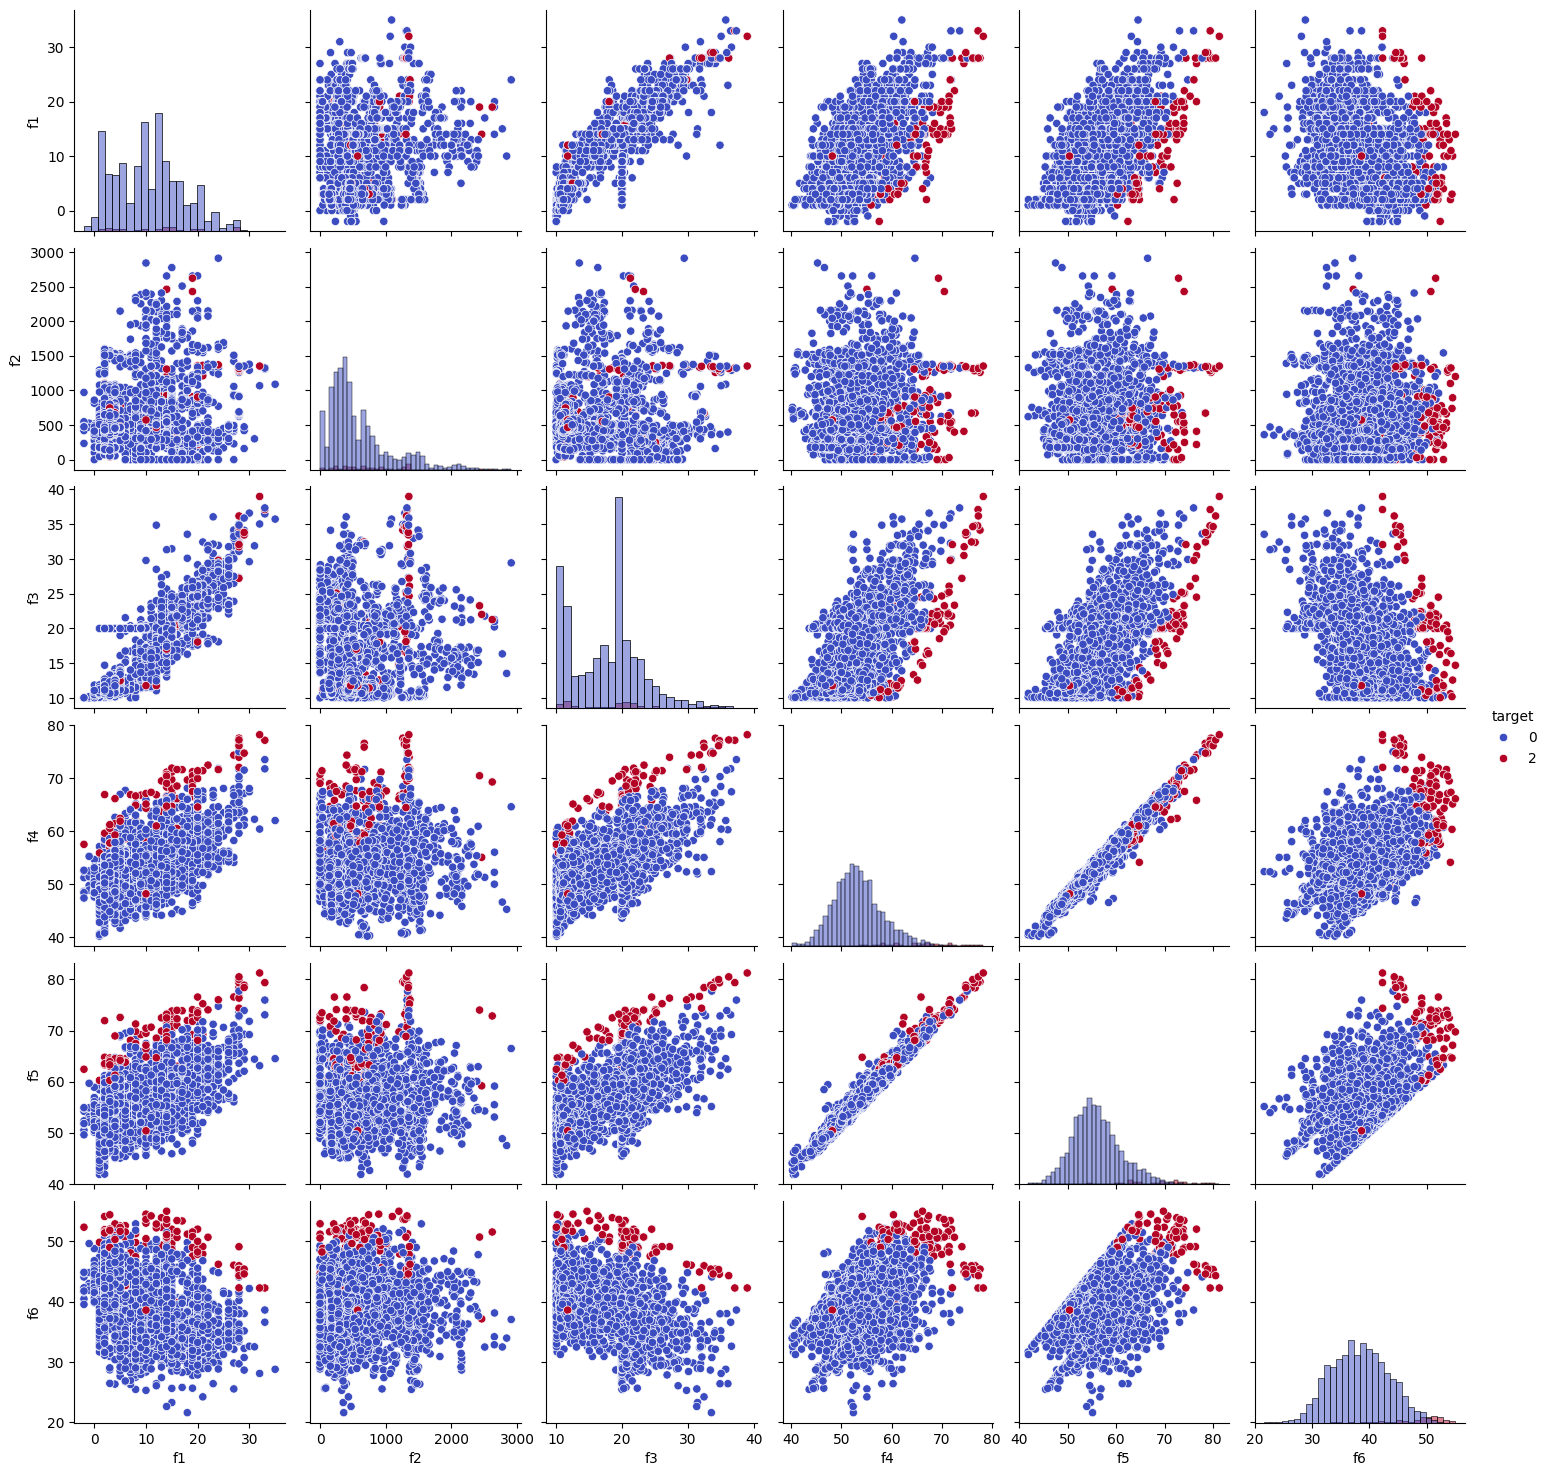

In [ ]:
sns.pairplot(df1[['f1','f2','f3','f4','f5','f6','target']],hue='target',palette='coolwarm',diag_kind='hist')

In [ ]:
df.isnull().sum()

WTGID             0
Loc               0
MonthStartDate    0
f1                0
f2                0
f3                0
f4                0
f5                0
f6                0
target            0
Dataset           0
dtype: int64

In [ ]:
df.describe()

WTGID          Loc           f1           f2           f3  \
count  2820.000000  2820.000000  2820.000000  2820.000000  2820.000000   
mean    216.631915     0.061702    10.729078   590.811120    17.829852   
std     129.716773     0.240656     6.663051   478.954251     5.361120   
min       1.000000     0.000000    -2.000000     0.010603    10.021329   
25%      99.000000     0.000000     5.000000   270.728276    12.318893   
50%     210.000000     0.000000    10.000000   440.309314    18.886098   
75%     308.000000     0.000000    15.000000   764.052515    20.475774   
max     479.000000     1.000000    35.000000  2908.814992    38.974796   

                f4           f5           f6       target  
count  2820.000000  2820.000000  2820.000000  2820.000000  
mean     53.851848    56.548878    38.719293     0.081560  
std       5.518501     5.701417     5.392273     0.395631  
min      40.188585    41.860309    21.589952     0.000000  
25%      50.208231    52.659107    34.779167     0.000000  
50%      53.157792    55.676294    38.474893     0.000000  
75%      56.575462    59.412532    42.268017     0.000000  
max      78.220308    81.260332    55.025626     2.000000

In [ ]:
df['target'].value_counts()

target
0    2705
2     115
Name: count, dtype: int64

Observation:
The Training Dataset is very imbalanced (0 : 2705, 2 : 115)



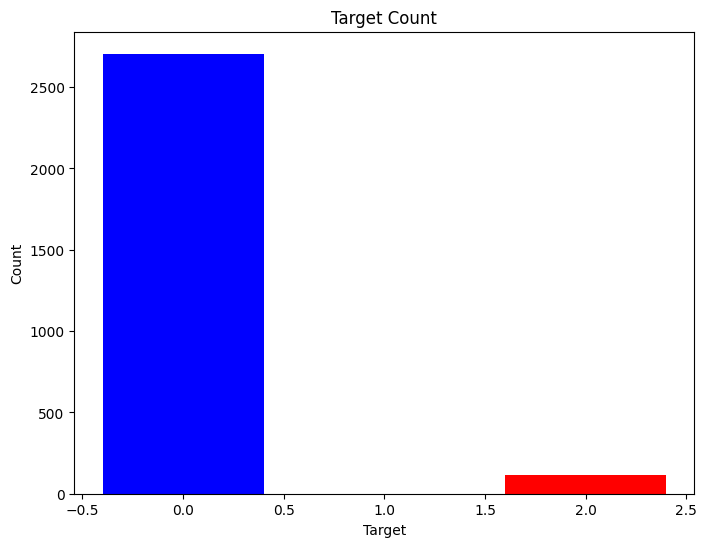

In [ ]:
target = df['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target.index, target, color=['blue', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Count')
plt.show()

### Upsmapling - Handling Imbalanced Training Data

In [ ]:
#upsampling
df_majority = df[df['target']==0]
df_minority = df[df['target']==2]

In [ ]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [ ]:
df_minority_upsampled.shape

(2705, 11)

In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled['target'].value_counts()

target
0    2705
2    2705
Name: count, dtype: int64

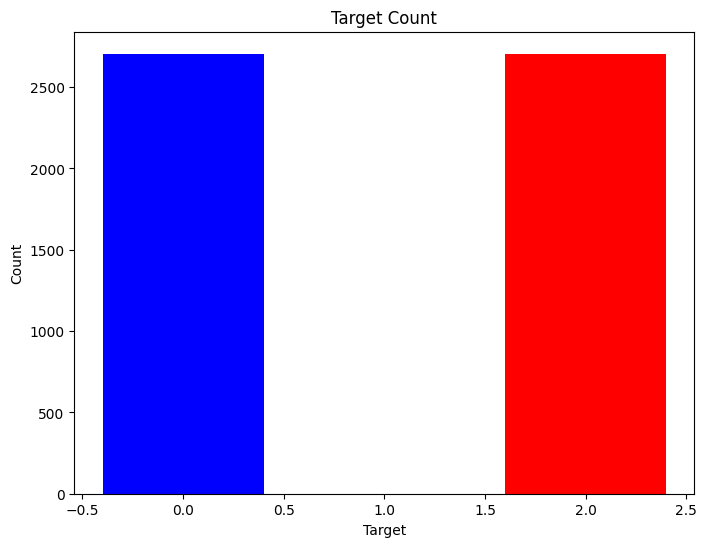

In [ ]:
target = df_upsampled['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target.index, target, color=['blue', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Count')
plt.show()

In [ ]:
df_upsampled.tail(10)

WTGID  Loc  MonthStartDate  f1           f2         f3         f4  \
492      67    0   2/1/2022 0:00   8   724.511251  19.991880  66.664682   
1749    257    1  11/1/2022 0:00  20  1315.588141  25.046485  71.050836   
1041    178    0   3/1/2023 0:00  13   242.898207  17.537581  63.631949   
1657    246    0   1/1/2023 0:00  19   758.595415  20.984567  67.488292   
1747    257    1   9/1/2022 0:00  28  1335.923614  31.747107  74.411807   
522      70    0  10/1/2022 0:00  13   915.396439  20.494830  64.366710   
2234    331    0   2/1/2024 0:00   1   419.194299  10.389781  55.902177   
492      67    0   2/1/2022 0:00   8   724.511251  19.991880  66.664682   
469      64    0   3/1/2022 0:00  14   925.096647  20.083911  61.011818   
278      42    0  10/1/2022 0:00  15   544.186330  21.854353  67.645177   

             f5         f6  target Dataset  
492   69.827958  49.836077       2   model  
1749  73.819117  48.772632       2   model  
1041  69.903705  52.366125       2   model  
1657  71.807244  50.822677       2   model  
1747  76.682409  44.935303       2   model  
522   69.883508  49.388678       2   model  
2234  60.258566  49.868786       2     val  
492   69.827958  49.836077       2   model  
469   65.708500  45.624589       2   model  
278   72.786736  50.932383       2   model

In [ ]:
df_upsampled.shape

(5410, 11)

In [ ]:
#!pip install imblearn

In [ ]:
#from imblearn.over_sampling import SMOTE

In [ ]:
#oversample = SMOTE()

In [ ]:
#X,y = oversample.fit_resample(df_upsampled.drop(['target'],axis=1),df_upsampled['target'])

In [ ]:
#X.shape

In [ ]:
#y.shape

In [ ]:
#len(y[y==0])

In [ ]:
#len(y[y==2])

In [ ]:

#df1 = pd.DataFrame(X,columns=train_df.columns[:-1])
#df2 = pd.DataFrame(y,columns=['target'])
#df_smote = pd.concat([df1,df2],axis=1)

In [ ]:
#train_df_smote.head()

In [ ]:
#train_df_smote.shape

In [ ]:
df.describe()

WTGID          Loc           f1           f2           f3  \
count  2820.000000  2820.000000  2820.000000  2820.000000  2820.000000   
mean    216.631915     0.061702    10.729078   590.811120    17.829852   
std     129.716773     0.240656     6.663051   478.954251     5.361120   
min       1.000000     0.000000    -2.000000     0.010603    10.021329   
25%      99.000000     0.000000     5.000000   270.728276    12.318893   
50%     210.000000     0.000000    10.000000   440.309314    18.886098   
75%     308.000000     0.000000    15.000000   764.052515    20.475774   
max     479.000000     1.000000    35.000000  2908.814992    38.974796   

                f4           f5           f6       target  
count  2820.000000  2820.000000  2820.000000  2820.000000  
mean     53.851848    56.548878    38.719293     0.081560  
std       5.518501     5.701417     5.392273     0.395631  
min      40.188585    41.860309    21.589952     0.000000  
25%      50.208231    52.659107    34.779167     0.000000  
50%      53.157792    55.676294    38.474893     0.000000  
75%      56.575462    59.412532    42.268017     0.000000  
max      78.220308    81.260332    55.025626     2.000000

In [ ]:
df_upsampled.describe()

WTGID          Loc           f1           f2           f3  \
count  5410.000000  5410.000000  5410.000000  5410.000000  5410.000000   
mean    208.182810     0.118669    11.855083   656.653795    18.703285   
std     132.328112     0.323429     7.569758   489.235102     6.290800   
min       1.000000     0.000000    -2.000000     0.010603    10.021329   
25%      77.000000     0.000000     5.000000   291.433854    12.296072   
50%     228.000000     0.000000    12.000000   530.890185    19.994263   
75%     301.000000     0.000000    16.000000   897.068449    21.814049   
max     479.000000     1.000000    35.000000  2908.814992    38.974796   

                f4           f5           f6       target  
count  5410.000000  5410.000000  5410.000000  5410.000000  
mean     59.262975    62.383708    43.680562     1.000000  
std       8.257017     8.539835     7.079110     1.000092  
min      40.188585    41.860309    21.589952     0.000000  
25%      52.728338    55.037849    37.862391     0.000000  
50%      58.239950    62.155287    44.328693     1.000000  
75%      66.154815    69.467032    50.471797     2.000000  
max      78.220308    81.260332    55.025626     2.000000

In [ ]:
#df_smote.describe()

### Vizualisation - Checking for outliers

Text(0, 0.5, 'Frequency')

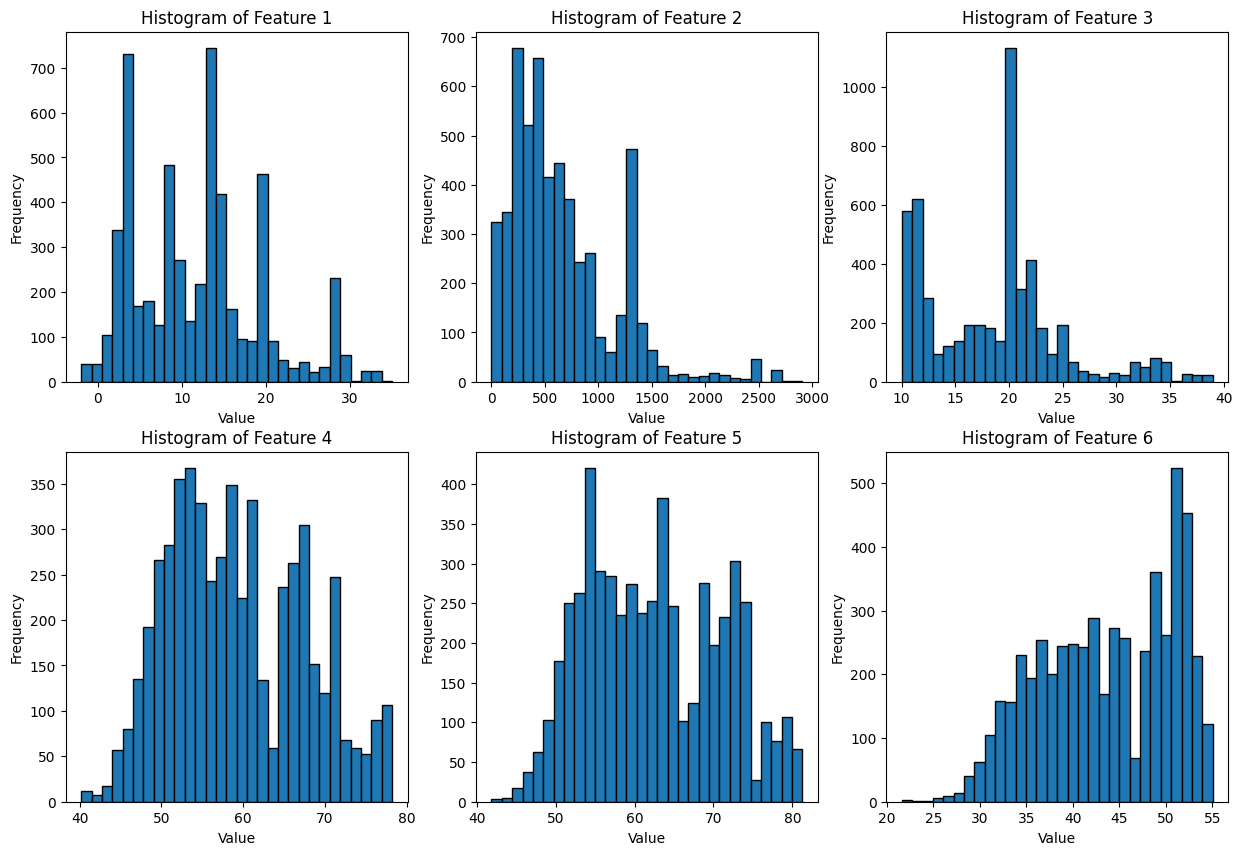

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0][0].hist(df_upsampled['f1'], bins=30, edgecolor='black')
axes[0][0].set_title('Histogram of Feature 1')
axes[0][0].set_xlabel('Value')
axes[0][0].set_ylabel('Frequency')
axes[0][1].hist(df_upsampled['f2'], bins=30, edgecolor='black')
axes[0][1].set_title('Histogram of Feature 2')
axes[0][1].set_xlabel('Value')
axes[0][1].set_ylabel('Frequency')
axes[0][2].hist(df_upsampled['f3'], bins=30, edgecolor='black')
axes[0][2].set_title('Histogram of Feature 3')
axes[0][2].set_xlabel('Value')
axes[0][2].set_ylabel('Frequency')
axes[1][0].hist(df_upsampled['f4'], bins=30, edgecolor='black')
axes[1][0].set_title('Histogram of Feature 4')
axes[1][0].set_xlabel('Value')
axes[1][0].set_ylabel('Frequency')
axes[1][1].hist(df_upsampled['f5'], bins=30, edgecolor='black')
axes[1][1].set_title('Histogram of Feature 5')
axes[1][1].set_xlabel('Value')
axes[1][1].set_ylabel('Frequency')
axes[1][2].hist(df_upsampled['f6'], bins=30, edgecolor='black')
axes[1][2].set_title('Histogram of Feature 6')
axes[1][2].set_xlabel('Value')
axes[1][2].set_ylabel('Frequency')

Text(0, 0.5, 'Density')

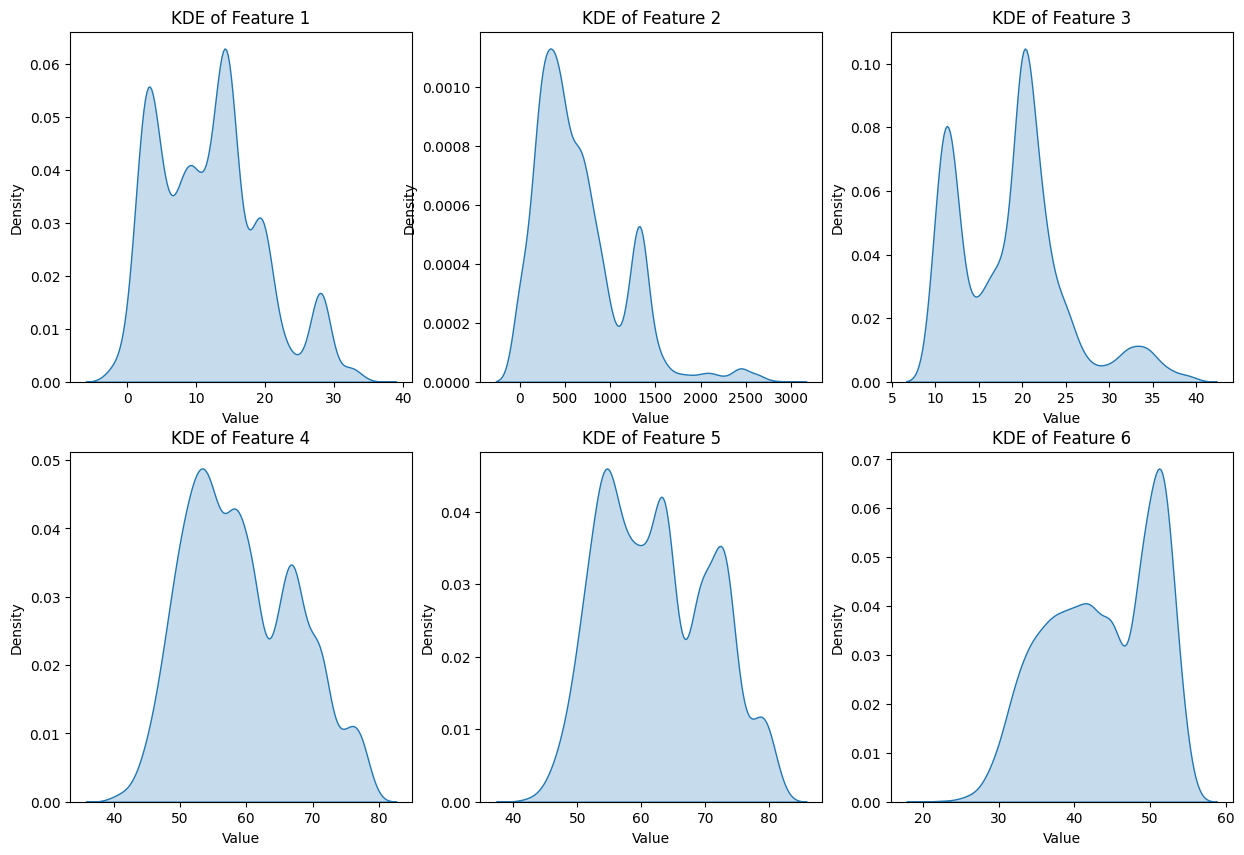

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.kdeplot(df_upsampled['f1'], fill=True,ax=axes[0][0])
axes[0][0].set_title('KDE of Feature 1')
axes[0][0].set_xlabel('Value')
axes[0][0].set_ylabel('Density')
sns.kdeplot(df_upsampled['f2'], fill=True,ax=axes[0][1])
axes[0][1].set_title('KDE of Feature 2')
axes[0][1].set_xlabel('Value')
axes[0][1].set_ylabel('Density')
sns.kdeplot(df_upsampled['f3'], fill=True,ax=axes[0][2])
axes[0][2].set_title('KDE of Feature 3')
axes[0][2].set_xlabel('Value')
axes[0][2].set_ylabel('Density')
sns.kdeplot(df_upsampled['f4'], fill=True,ax=axes[1][0])
axes[1][0].set_title('KDE of Feature 4')
axes[1][0].set_xlabel('Value')
axes[1][0].set_ylabel('Density')
sns.kdeplot(df_upsampled['f5'], fill=True,ax=axes[1][1])
axes[1][1].set_title('KDE of Feature 5')
axes[1][1].set_xlabel('Value')
axes[1][1].set_ylabel('Density')
sns.kdeplot(df_upsampled['f6'], fill=True,ax=axes[1][2])
axes[1][2].set_title('KDE of Feature 6')
axes[1][2].set_xlabel('Value')
axes[1][2].set_ylabel('Density')

Text(0.5, 1.0, 'Feature 6')

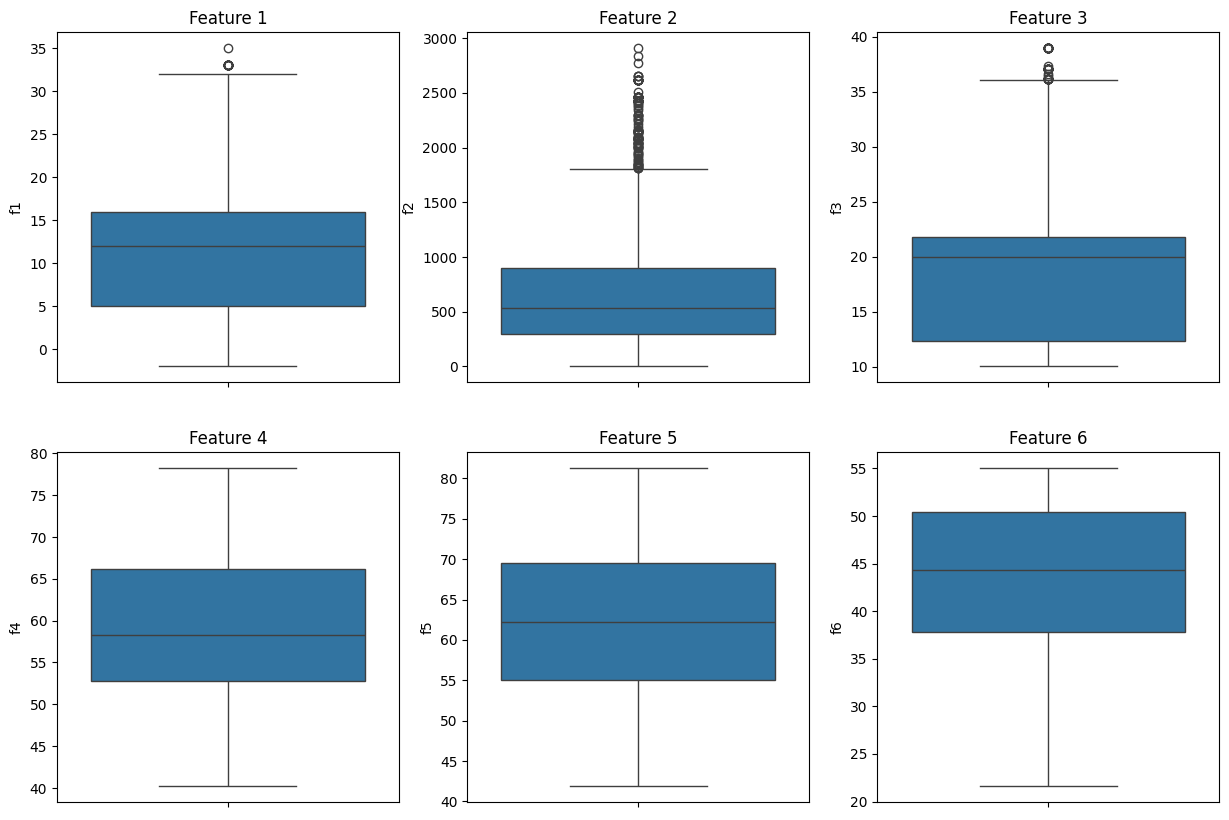

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(df_upsampled['f1'], ax=axes[0][0])
axes[0][0].set_title('Feature 1')
sns.boxplot(df_upsampled['f2'],ax=axes[0][1])
axes[0][1].set_title('Feature 2')
sns.boxplot(df_upsampled['f3'],ax=axes[0][2])
axes[0][2].set_title('Feature 3')
sns.boxplot(df_upsampled['f4'],ax=axes[1][0])
axes[1][0].set_title('Feature 4')
sns.boxplot(df_upsampled['f5'],ax=axes[1][1])
axes[1][1].set_title('Feature 5')
sns.boxplot(df_upsampled['f6'],ax=axes[1][2])
axes[1][2].set_title('Feature 6')

Observation:

f1,f2,f3 has outliers
[f2 has highest outliers compared to f1 and f3 ; f3 has more outliers than f1]

f4,f5,f6 has no outliers

### Handling outliers

In [ ]:
from scipy.stats import zscore

f1_z_score = zscore(df_upsampled['f1'])
f2_z_score = zscore(df_upsampled['f2'])
f3_z_score = zscore(df_upsampled['f3'])
f4_z_score = zscore(df_upsampled['f4'])
f5_z_score = zscore(df_upsampled['f5'])
f6_z_score = zscore(df_upsampled['f6'])

In [ ]:
threshold = 2
f1_outlier_indices = np.where(np.abs(f1_z_score) > threshold)[0]
f2_outlier_indices = np.where(np.abs(f2_z_score) > threshold)[0]
f3_outlier_indices = np.where(np.abs(f3_z_score) > threshold)[0]
f4_outlier_indices = np.where(np.abs(f4_z_score) > threshold)[0]
f5_outlier_indices = np.where(np.abs(f5_z_score) > threshold)[0]
f6_outlier_indices = np.where(np.abs(f6_z_score) > threshold)[0]
print(f"Feature 1 Outlier indices: {f1_outlier_indices}")
print(f"Feature 2 Outlier indices: {f2_outlier_indices}")
print(f"Feature 3 Outlier indices: {f3_outlier_indices}")
print(f"Feature 4 Outlier indices: {f4_outlier_indices}")
print(f"Feature 5 Outlier indices: {f5_outlier_indices}")
print(f"Feature 6 Outlier indices: {f6_outlier_indices}")

Feature 1 Outlier indices: [ 163  186  256  266  272  310  320  326  336  451  468  502  510  542
  559  566  682  693  703  713  950 1621 1622 1632 1639 1640 1646 1658
 1659 1660 1661 1669 1670 1682 1690 1691 1701 1708 1709 1746 1842 2653
 2708 2715 2716 2717 2718 2726 2735 2739 2747 2763 2765 2777 2783 2796
 2806 2809 2815 2820 2825 2828 2829 2831 2835 2839 2858 2880 2897 2903
 2921 2923 2934 2949 2965 2972 2983 2985 2987 2992 2994 3002 3011 3015
 3021 3027 3044 3059 3068 3072 3074 3083 3091 3095 3118 3148 3150 3151
 3157 3197 3199 3200 3205 3220 3221 3234 3270 3279 3282 3283 3293 3299
 3300 3312 3313 3318 3323 3346 3362 3363 3374 3378 3381 3384 3394 3408
 3417 3428 3430 3438 3459 3462 3463 3465 3492 3493 3497 3509 3543 3550
 3555 3561 3563 3570 3601 3603 3607 3615 3623 3639 3640 3695 3704 3714
 3719 3723 3729 3730 3739 3746 3754 3756 3766 3772 3796 3811 3813 3829
 3833 3835 3851 3852 3853 3856 3880 3886 3887 3891 3911 3923 3930 3932
 3954 3957 3970 3971 3978 3984 3987 4013 4016 4017

In [ ]:
f2_median_val = np.median(np.delete(df_upsampled['f2'].values, f1_outlier_indices))
df_upsampled_cleaned = df_upsampled.copy()
df_upsampled_cleaned['f2'].values[f2_outlier_indices] = f2_median_val

In [ ]:
#import statistics
f3_mean_val = np.sqrt(np.log(np.mean(np.delete(df_upsampled['f3'].values, f1_outlier_indices))))
df_upsampled_cleaned['f3'].values[f3_outlier_indices] = f3_mean_val

In [ ]:
#train_df_upsampled_cleaned = train_df_upsampled[~train_df_upsampled.index.isin(outlier_indices)]

In [ ]:
df_upsampled.shape

(5410, 11)

In [ ]:
df_upsampled_cleaned.shape

(5410, 11)

In [ ]:
df_upsampled_cleaned.describe()

WTGID          Loc           f1           f2           f3  \
count  5410.000000  5410.000000  5410.000000  5410.000000  5410.000000   
mean    208.182810     0.118669    11.855083   602.006487    16.655486   
std     132.328112     0.323429     7.569758   396.556641     6.185019   
min       1.000000     0.000000    -2.000000     0.010603     1.693489   
25%      77.000000     0.000000     5.000000   291.433854    11.782187   
50%     228.000000     0.000000    12.000000   487.336491    18.535453   
75%     301.000000     0.000000    16.000000   823.826058    20.790087   
max     479.000000     1.000000    35.000000  1627.081587    31.125399   

                f4           f5           f6       target  
count  5410.000000  5410.000000  5410.000000  5410.000000  
mean     59.262975    62.383708    43.680562     1.000000  
std       8.257017     8.539835     7.079110     1.000092  
min      40.188585    41.860309    21.589952     0.000000  
25%      52.728338    55.037849    37.862391     0.000000  
50%      58.239950    62.155287    44.328693     1.000000  
75%      66.154815    69.467032    50.471797     2.000000  
max      78.220308    81.260332    55.025626     2.000000

Text(0, 0.5, 'Frequency')

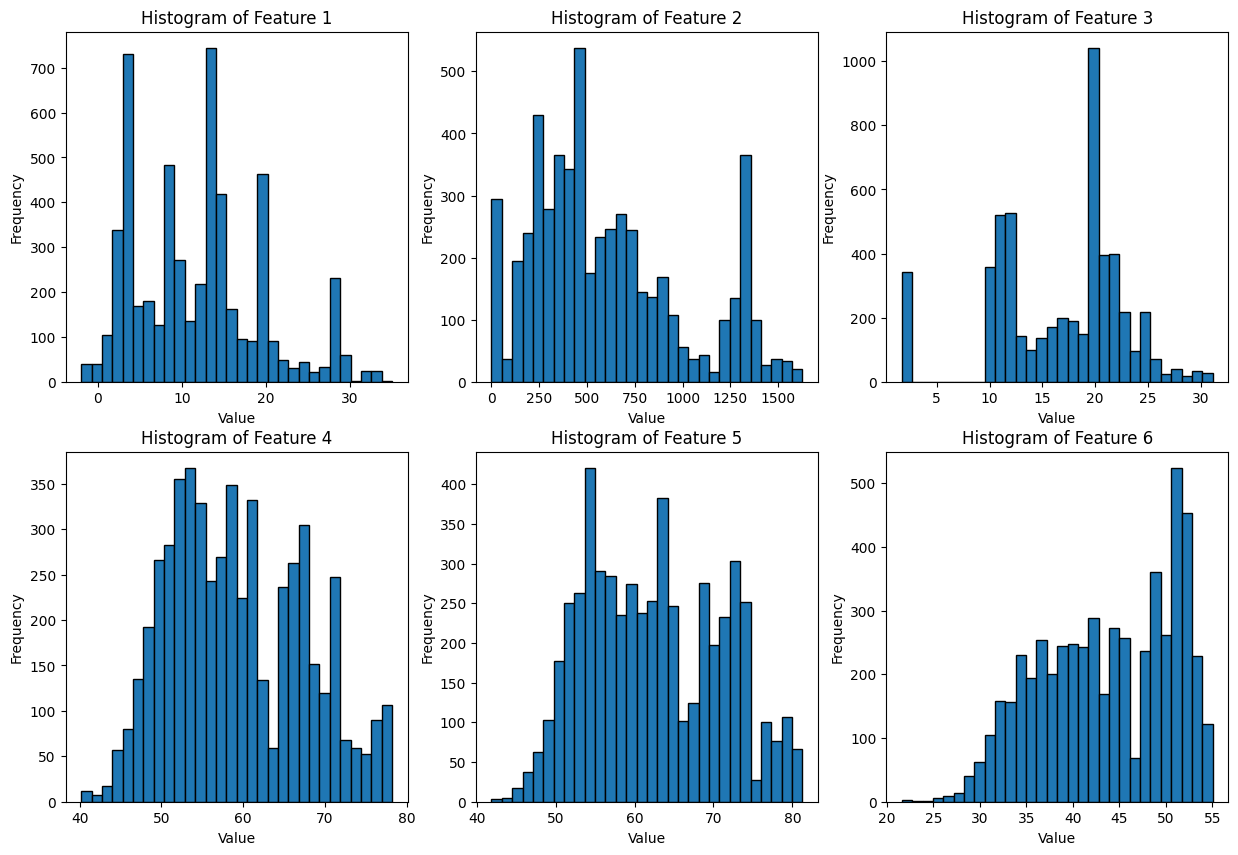

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0][0].hist(df_upsampled_cleaned['f1'], bins=30, edgecolor='black')
axes[0][0].set_title('Histogram of Feature 1')
axes[0][0].set_xlabel('Value')
axes[0][0].set_ylabel('Frequency')
axes[0][1].hist(df_upsampled_cleaned['f2'], bins=30, edgecolor='black')
axes[0][1].set_title('Histogram of Feature 2')
axes[0][1].set_xlabel('Value')
axes[0][1].set_ylabel('Frequency')
axes[0][2].hist(df_upsampled_cleaned['f3'], bins=30, edgecolor='black')
axes[0][2].set_title('Histogram of Feature 3')
axes[0][2].set_xlabel('Value')
axes[0][2].set_ylabel('Frequency')
axes[1][0].hist(df_upsampled_cleaned['f4'], bins=30, edgecolor='black')
axes[1][0].set_title('Histogram of Feature 4')
axes[1][0].set_xlabel('Value')
axes[1][0].set_ylabel('Frequency')
axes[1][1].hist(df_upsampled_cleaned['f5'], bins=30, edgecolor='black')
axes[1][1].set_title('Histogram of Feature 5')
axes[1][1].set_xlabel('Value')
axes[1][1].set_ylabel('Frequency')
axes[1][2].hist(df_upsampled_cleaned['f6'], bins=30, edgecolor='black')
axes[1][2].set_title('Histogram of Feature 6')
axes[1][2].set_xlabel('Value')
axes[1][2].set_ylabel('Frequency')

Text(0, 0.5, 'Density')

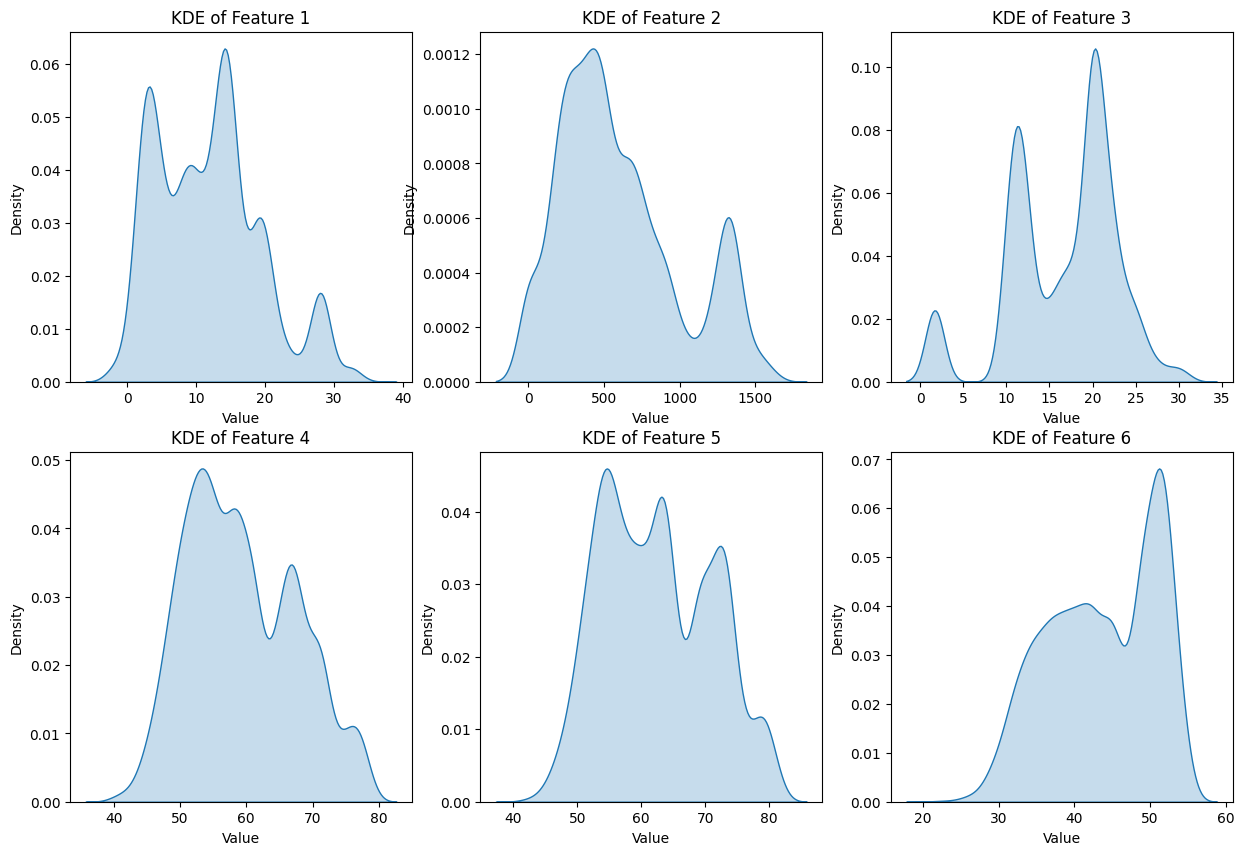

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.kdeplot(df_upsampled_cleaned['f1'], fill=True,ax=axes[0][0])
axes[0][0].set_title('KDE of Feature 1')
axes[0][0].set_xlabel('Value')
axes[0][0].set_ylabel('Density')
sns.kdeplot(df_upsampled_cleaned['f2'], fill=True,ax=axes[0][1])
axes[0][1].set_title('KDE of Feature 2')
axes[0][1].set_xlabel('Value')
axes[0][1].set_ylabel('Density')
sns.kdeplot(df_upsampled_cleaned['f3'], fill=True,ax=axes[0][2])
axes[0][2].set_title('KDE of Feature 3')
axes[0][2].set_xlabel('Value')
axes[0][2].set_ylabel('Density')
sns.kdeplot(df_upsampled_cleaned['f4'], fill=True,ax=axes[1][0])
axes[1][0].set_title('KDE of Feature 4')
axes[1][0].set_xlabel('Value')
axes[1][0].set_ylabel('Density')
sns.kdeplot(df_upsampled_cleaned['f5'], fill=True,ax=axes[1][1])
axes[1][1].set_title('KDE of Feature 5')
axes[1][1].set_xlabel('Value')
axes[1][1].set_ylabel('Density')
sns.kdeplot(df_upsampled_cleaned['f6'], fill=True,ax=axes[1][2])
axes[1][2].set_title('KDE of Feature 6')
axes[1][2].set_xlabel('Value')
axes[1][2].set_ylabel('Density')

Text(0.5, 1.0, 'Feature 6')

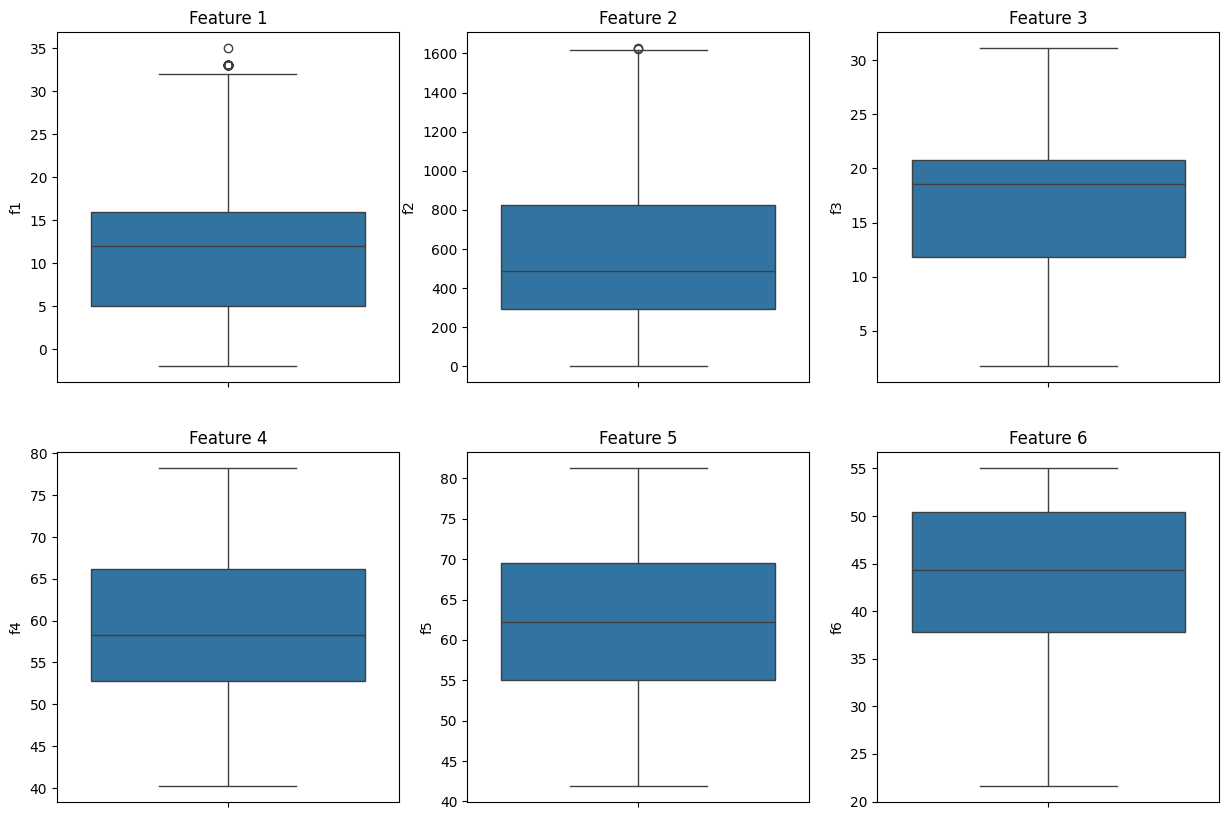

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(df_upsampled_cleaned['f1'], ax=axes[0][0])
axes[0][0].set_title('Feature 1')
sns.boxplot(df_upsampled_cleaned['f2'],ax=axes[0][1])
axes[0][1].set_title('Feature 2')
sns.boxplot(df_upsampled_cleaned['f3'],ax=axes[0][2])
axes[0][2].set_title('Feature 3')
sns.boxplot(df_upsampled_cleaned['f4'],ax=axes[1][0])
axes[1][0].set_title('Feature 4')
sns.boxplot(df_upsampled_cleaned['f5'],ax=axes[1][1])
axes[1][1].set_title('Feature 5')
sns.boxplot(df_upsampled_cleaned['f6'],ax=axes[1][2])
axes[1][2].set_title('Feature 6')

## Train and Validation Data Split

In [ ]:
df_upsampled_cleaned.head()

WTGID  Loc  MonthStartDate  f1          f2         f3         f4  \
0      1    0   1/1/2023 0:00  18  957.789366  20.874546  68.134813   
3      1    0  11/1/2023 0:00  11  663.835767  16.684462  53.445851   
4      1    0  12/1/2023 0:00  10  637.476813  14.833431  52.736094   
5      1    0   1/1/2024 0:00   9  807.604542  12.317073  50.720894   
6      1    0   2/1/2024 0:00  13  779.106856  15.441633  53.282554   

          f5         f6  target Dataset  
0  70.717770  49.843224       0   model  
3  57.014395  40.329933       0     val  
4  56.381326  41.547895       0     val  
5  54.286049  41.968976       0     val  
6  56.961366  41.519733       0     val

In [ ]:
df_train = df_upsampled_cleaned[df_upsampled_cleaned['Dataset']=='model']
df_val = df_upsampled_cleaned[df_upsampled_cleaned['Dataset']=='val']

In [ ]:
df_upsampled_cleaned.shape,df_train.shape,df_val.shape

((5410, 11), (2978, 11), (2432, 11))

In [ ]:
df_upsampled_cleaned[['WTGID','Loc','f1','f2','f3','f4','f5','f6','target']].corr()

WTGID       Loc        f1        f2        f3        f4        f5  \
WTGID   1.000000  0.119779 -0.033663 -0.122961 -0.175851 -0.068492 -0.079945   
Loc     0.119779  1.000000  0.505714  0.488126 -0.209235  0.458206  0.436415   
f1     -0.033663  0.505714  1.000000  0.238537  0.169328  0.620584  0.579564   
f2     -0.122961  0.488126  0.238537  1.000000 -0.198658  0.310273  0.306571   
f3     -0.175851 -0.209235  0.169328 -0.198658  1.000000  0.017526  0.014959   
f4     -0.068492  0.458206  0.620584  0.310273  0.017526  1.000000  0.984306   
f5     -0.079945  0.436415  0.579564  0.306571  0.014959  0.984306  1.000000   
f6      0.024432  0.081978 -0.088441  0.125533 -0.155739  0.638663  0.690346   
target -0.069258  0.194332  0.163376  0.196515 -0.093408  0.714141  0.744206   

              f6    target  
WTGID   0.024432 -0.069258  
Loc     0.081978  0.194332  
f1     -0.088441  0.163376  
f2      0.125533  0.196515  
f3     -0.155739 -0.093408  
f4      0.638663  0.714141  
f5      0.690346  0.744206  
f6      1.000000  0.762649  
target  0.762649  1.000000

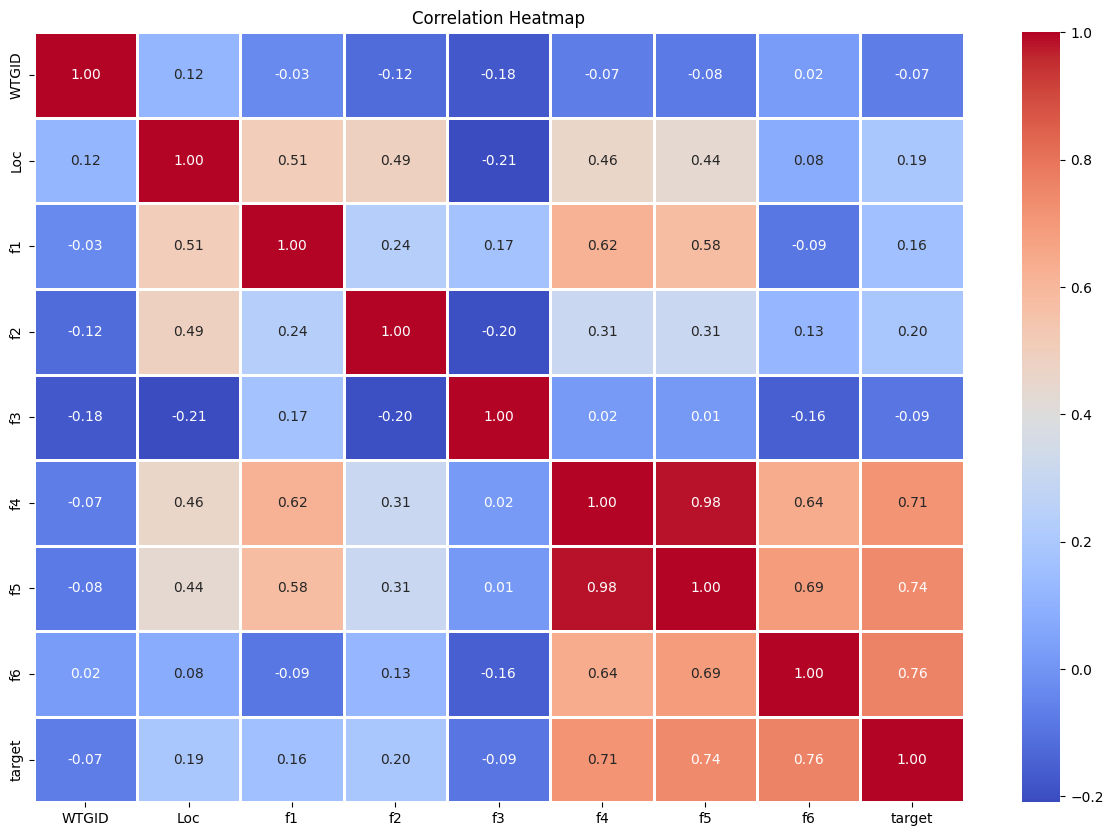

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_upsampled_cleaned[['WTGID','Loc','f1','f2','f3','f4','f5','f6','target']].corr(),fmt='.2f',annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

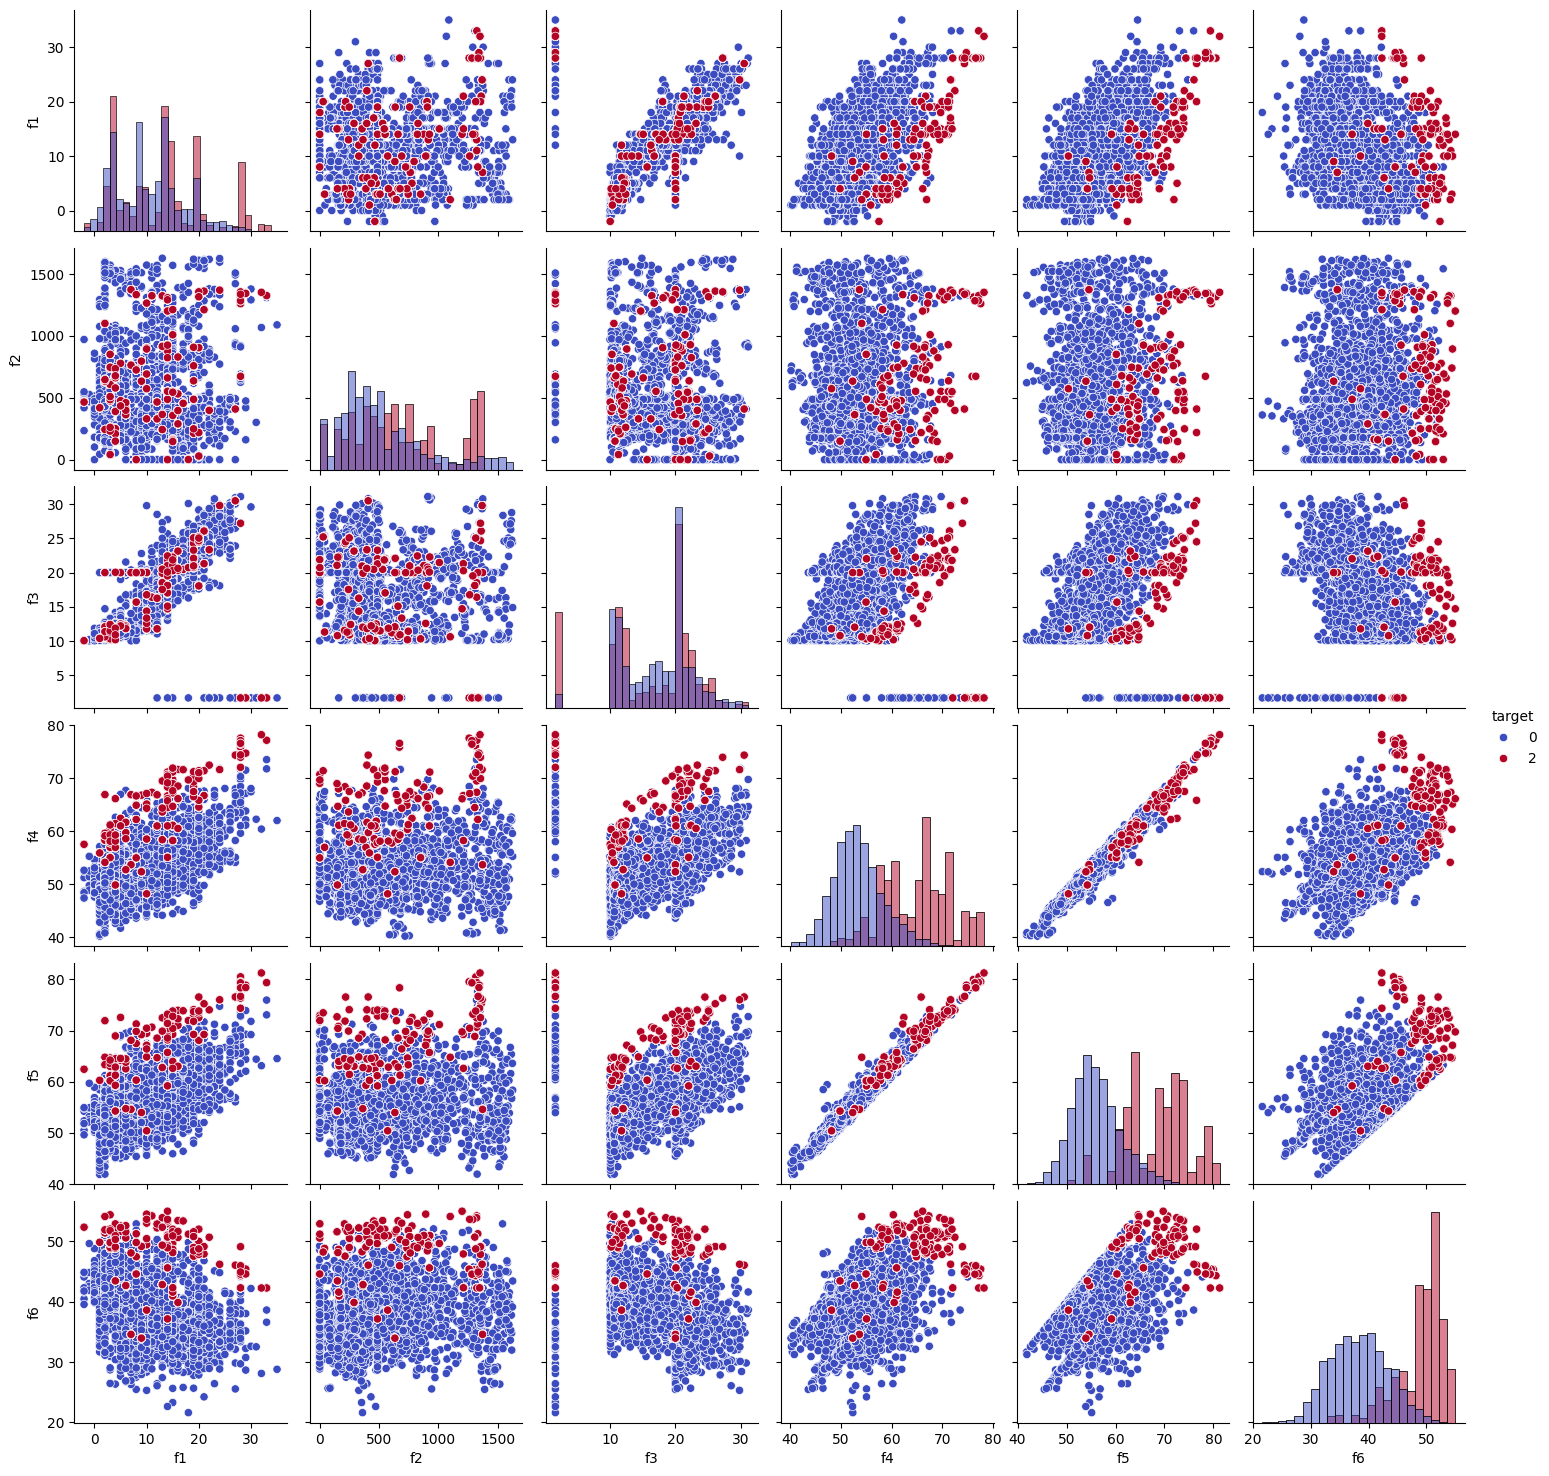

In [ ]:
sns.pairplot(df_upsampled_cleaned[['f1','f2','f3','f4','f5','f6','target']],hue='target',palette='coolwarm',diag_kind='hist')

In [ ]:
df_train['target'].value_counts()

target
2    1847
0    1131
Name: count, dtype: int64

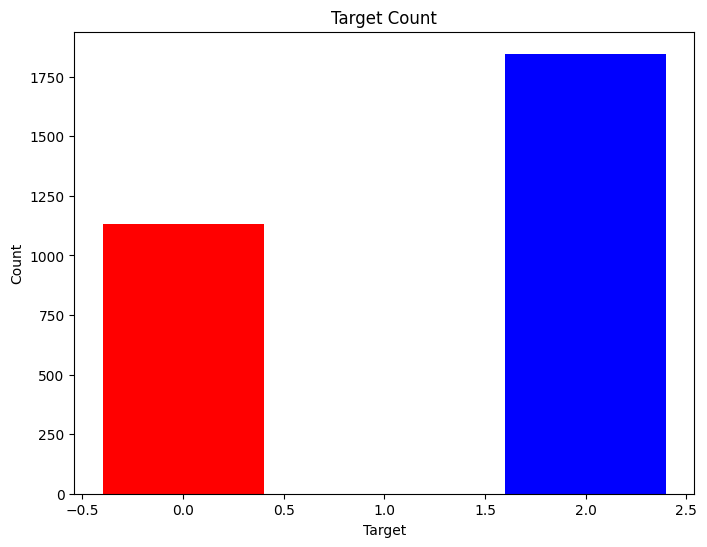

In [ ]:
target = df_train['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target.index, target, color=['blue', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Count')
plt.show()

In [ ]:
df_val['target'].value_counts()

target
0    1574
2     858
Name: count, dtype: int64

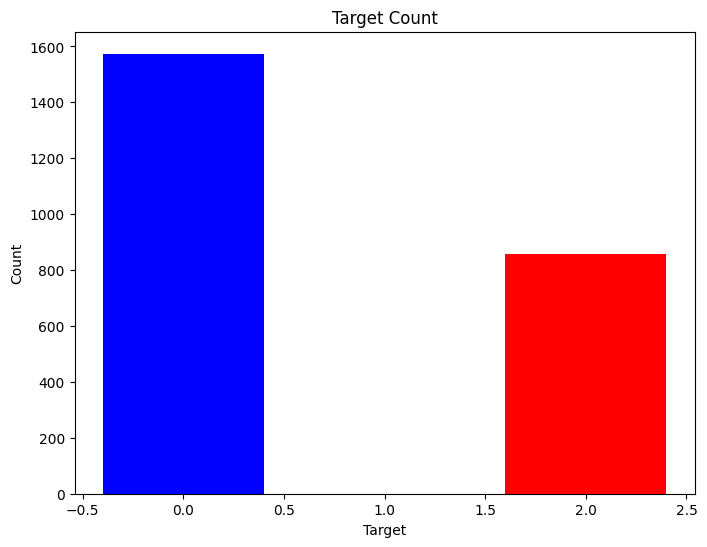

In [ ]:
target = df_val['target'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(target.index, target, color=['blue', 'red'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Count')
plt.show()

In [ ]:
df_train.drop(['MonthStartDate','Dataset'],axis=1,inplace=True)
df_val.drop(['MonthStartDate','Dataset'],axis=1,inplace=True)

In [ ]:
df_train.head()

WTGID  Loc  f1          f2         f3         f4         f5         f6  \
0       1    0  18  957.789366  20.874546  68.134813  70.717770  49.843224   
7       2    0  17  777.074521  21.778272  62.691870  66.175533  44.397261   
9       3    0  15  674.619574  17.731228  50.977072  52.650069  34.918841   
16      4    0  20  814.943037  21.550715  47.165751  49.759081  28.208366   
17      4    0  19  815.900214  20.738513  45.988724  48.522046  27.783533   

    target  
0        0  
7        0  
9        0  
16       0  
17       0

In [ ]:
df_train['WTGID'].value_counts()

WTGID
259    153
257    151
258    104
42      79
231     67
      ... 
39       1
425      1
449      1
3        1
2        1
Name: count, Length: 345, dtype: int64

In [ ]:
df_train['Loc'].value_counts()

Loc
0    2526
1     452
Name: count, dtype: int64

In [ ]:
df_train.corr()

WTGID       Loc        f1        f2        f3        f4        f5  \
WTGID   1.000000  0.261111 -0.025131 -0.092373 -0.236121 -0.116033 -0.134882   
Loc     0.261111  1.000000  0.508816  0.539901 -0.298191  0.490903  0.464392   
f1     -0.025131  0.508816  1.000000  0.250459 -0.084618  0.628088  0.581245   
f2     -0.092373  0.539901  0.250459  1.000000 -0.249273  0.340940  0.342905   
f3     -0.236121 -0.298191 -0.084618 -0.249273  1.000000 -0.138709 -0.131523   
f4     -0.116033  0.490903  0.628088  0.340940 -0.138709  1.000000  0.980780   
f5     -0.134882  0.464392  0.581245  0.342905 -0.131523  0.980780  1.000000   
f6     -0.072056  0.163807 -0.029174  0.160339 -0.098167  0.675562  0.734679   
target -0.138632  0.253885  0.226134  0.235512 -0.106167  0.741266  0.773772   

              f6    target  
WTGID  -0.072056 -0.138632  
Loc     0.163807  0.253885  
f1     -0.029174  0.226134  
f2      0.160339  0.235512  
f3     -0.098167 -0.106167  
f4      0.675562  0.741266  
f5      0.734679  0.773772  
f6      1.000000  0.769321  
target  0.769321  1.000000

Observation:

Features f4 and f5 are highly correlated

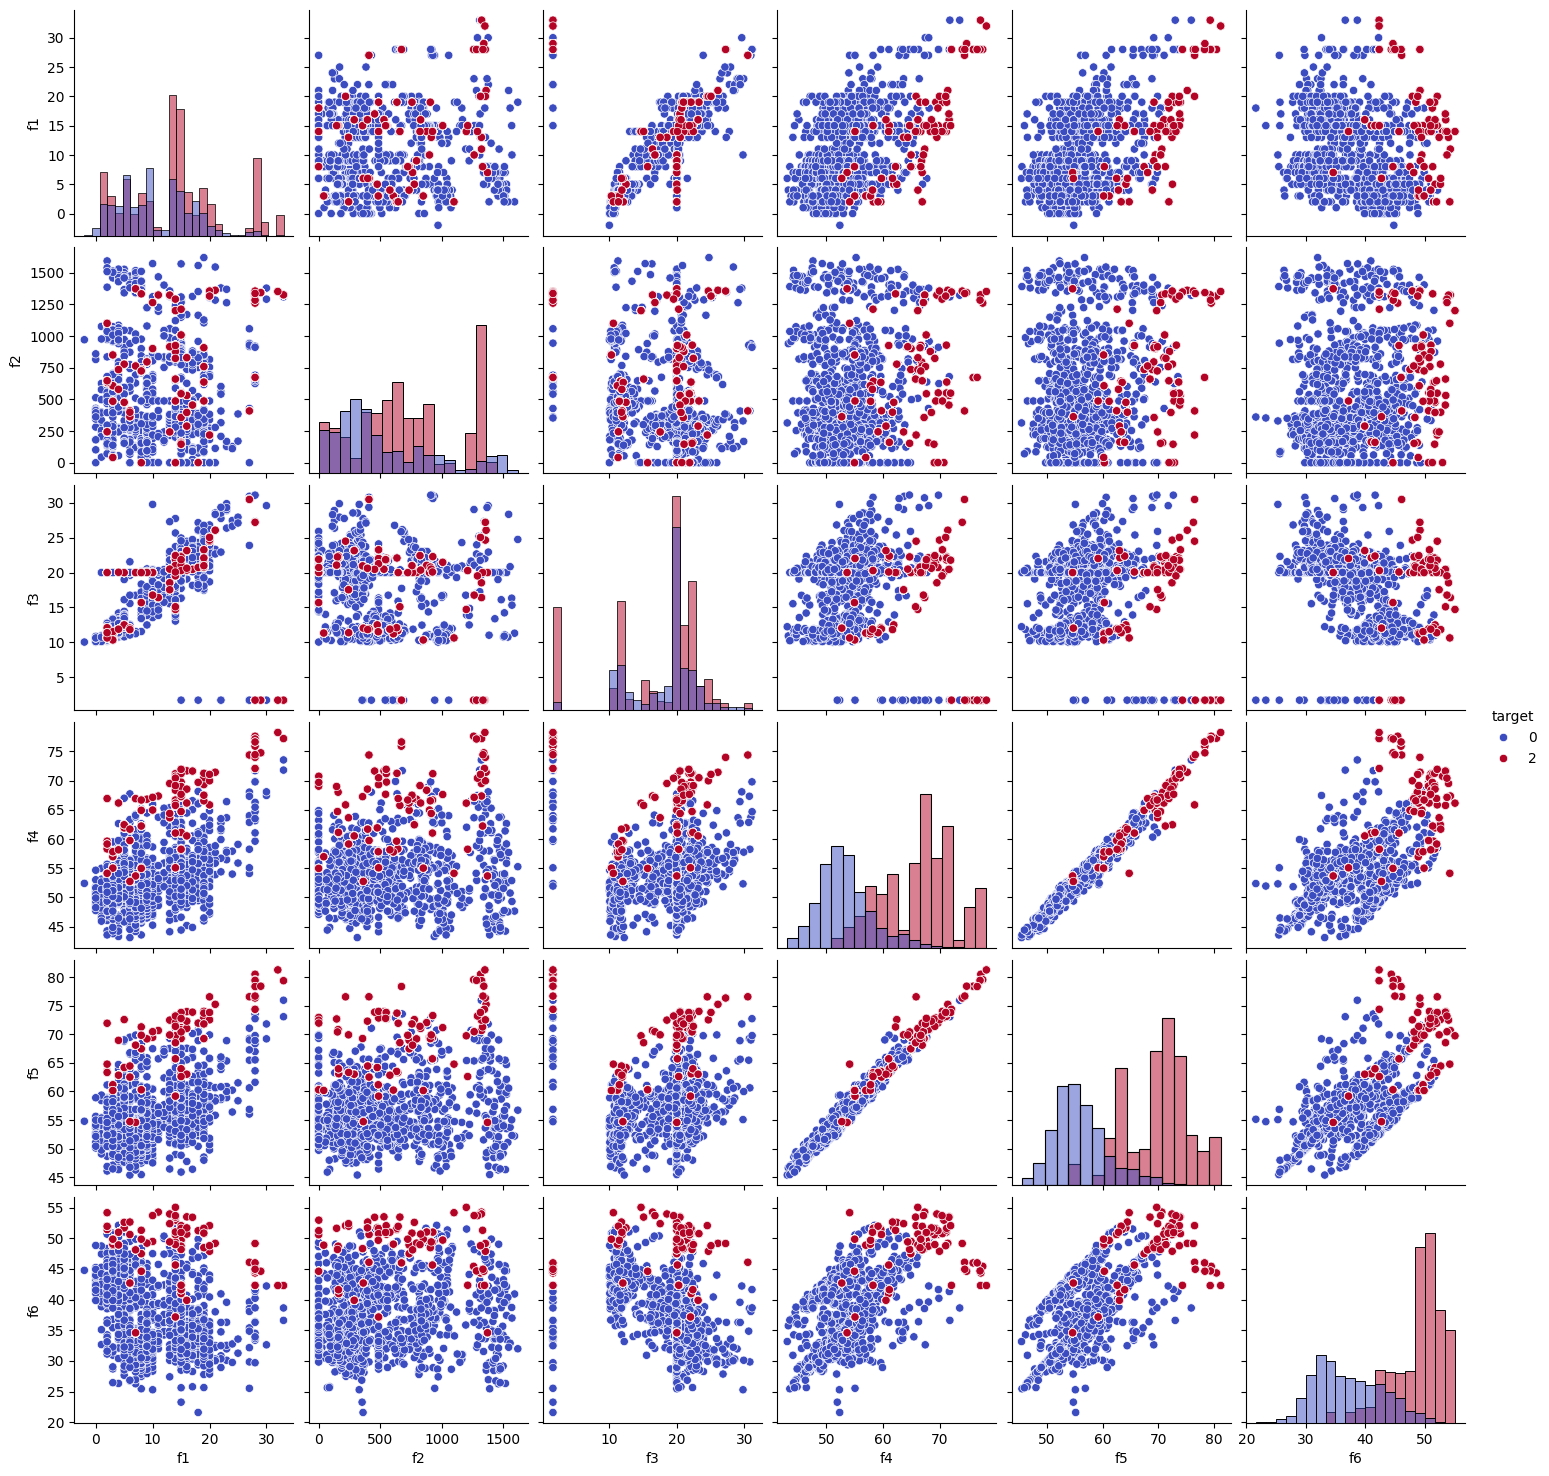

In [ ]:
sns.pairplot(df_train[['f1','f2','f3','f4','f5','f6','target']],hue='target',palette='coolwarm',diag_kind='hist')

## Simple Logistic Regressor

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

### Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logistic.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 63.36 %
-----------------------------------------------------
Confusion Matrix:
[[801 773]
 [118 740]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      1574
           2       0.49      0.86      0.62       858

    accuracy                           0.63      2432
   macro avg       0.68      0.69      0.63      2432
weighted avg       0.74      0.63      0.64      2432



### Hyper Parameter Tuning and Cross Validation

In [ ]:
model = LogisticRegression()

penalty = ['l1','l2','elasticnet']
c_values = [0.01,0.1,1,10,100]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']

In [ ]:
params = dict(penalty=penalty,C=c_values,solver=solver)

#### Grid Search CV


In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid_search = GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
round(grid_search.best_score_*100,2)

np.float64(88.41)

In [ ]:
y_pred = grid_search.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 90.34 %
-----------------------------------------------------
Confusion Matrix:
[[1400  174]
 [  61  797]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1574
           2       0.82      0.93      0.87       858

    accuracy                           0.90      2432
   macro avg       0.89      0.91      0.90      2432
weighted avg       0.91      0.90      0.90      2432



#### Randomised Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
random_search = RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
random_search

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}

In [ ]:
round(random_search.best_score_*100,2)

np.float64(87.2)

In [ ]:
y_pred = random_search.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 90.42 %
-----------------------------------------------------
Confusion Matrix:
[[1402  172]
 [  61  797]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1574
           2       0.82      0.93      0.87       858

    accuracy                           0.90      2432
   macro avg       0.89      0.91      0.90      2432
weighted avg       0.91      0.90      0.91      2432



### ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
model = LogisticRegression(C=1,penalty='l2',solver='newton-cg')
model.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [ ]:
model_prob = model.predict_proba(X_test)

In [ ]:
model_prob

array([[0.85876209, 0.14123791],
       [0.85275765, 0.14724235],
       [0.90534086, 0.09465914],
       ...,
       [0.16642301, 0.83357699],
       [0.97219999, 0.02780001],
       [0.24243346, 0.75756654]])

In [ ]:
#Lets focus on outcome = 2
model_prob = model_prob[:,1]

In [ ]:
model_auc = roc_auc_score(y_test,model_prob)
print('AUC:', round(model_auc*100,2),"%")

AUC: 94.63 %


In [ ]:
model_fpr,model_tpr,thresholds = roc_curve(y_test,model_prob,pos_label=2)

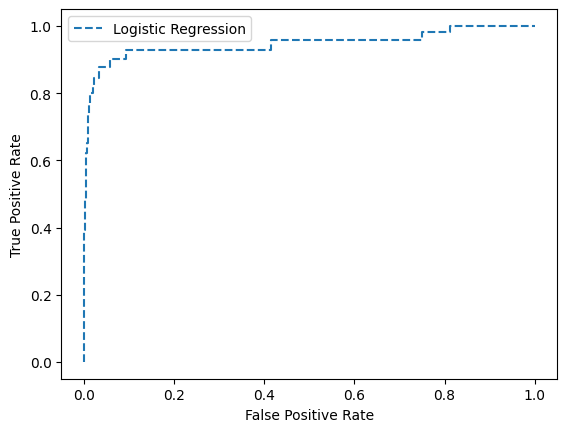

In [ ]:
plt.plot(model_fpr,model_tpr,linestyle='--',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

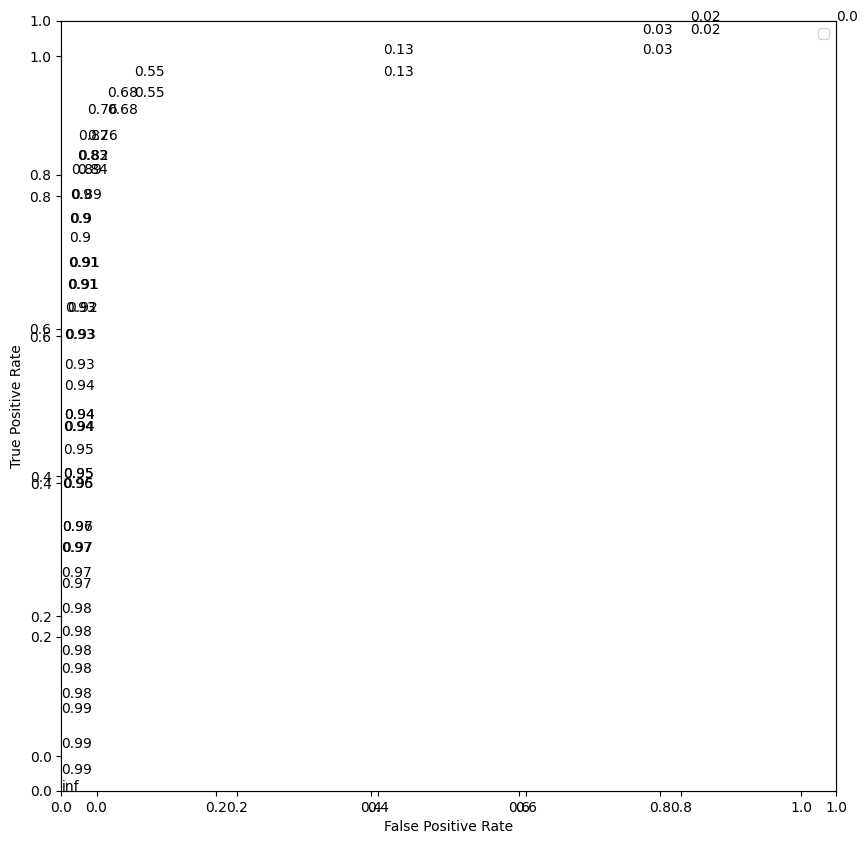

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic Regression')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s'% np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## SVM Classifier


In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

### Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 75.82 %
-----------------------------------------------------
Confusion Matrix:
[[1321  253]
 [ 335  523]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1574
           2       0.67      0.61      0.64       858

    accuracy                           0.76      2432
   macro avg       0.74      0.72      0.73      2432
weighted avg       0.75      0.76      0.76      2432



### Hyper parameter tuning

In [ ]:
param_grid = {'C' : [0.01, 0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']}

#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold()
grid_search = GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
grid_search.best_score_

np.float64(1.0)

In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 65.83 %
-----------------------------------------------------
Confusion Matrix:
[[1574    0]
 [ 831   27]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1574
           2       1.00      0.03      0.06       858

    accuracy                           0.66      2432
   macro avg       0.83      0.52      0.43      2432
weighted avg       0.78      0.66      0.53      2432



#### Randomised Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold()
random_search = RandomizedSearchCV(SVC(),param_distributions=param_grid,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
random_search

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='accuracy')

In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

In [ ]:
round(random_search.best_score_*100,2)

np.float64(100.0)

In [ ]:
y_pred = random_search.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 65.83 %
-----------------------------------------------------
Confusion Matrix:
[[1574    0]
 [ 831   27]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1574
           2       1.00      0.03      0.06       858

    accuracy                           0.66      2432
   macro avg       0.83      0.52      0.43      2432
weighted avg       0.78      0.66      0.53      2432



## KNN Classifier

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 67.89 %
-----------------------------------------------------
Confusion Matrix:
[[1480   94]
 [ 687  171]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      1574
           2       0.65      0.20      0.30       858

    accuracy                           0.68      2432
   macro avg       0.66      0.57      0.55      2432
weighted avg       0.67      0.68      0.62      2432



### Hyper parameter tuning

In [ ]:
param_grid = {'n_neighbors' : [2,3,4,5,6,7,8,9,10],
              'weights' : ['uniform', 'distance'],
              'p' : [1,2],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,refit=True,verbose=3,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

In [ ]:
grid_search.best_score_

np.float64(0.8763955783655744)

In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 72.29 %
-----------------------------------------------------
Confusion Matrix:
[[1553   21]
 [ 653  205]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1574
           2       0.91      0.24      0.38       858

    accuracy                           0.72      2432
   macro avg       0.81      0.61      0.60      2432
weighted avg       0.78      0.72      0.67      2432



#### Randomised Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import StratifiedKFold
#cv = StratifiedKFold()
random_search = RandomizedSearchCV(KNeighborsClassifier(),param_distributions=param_grid,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
random_search

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [ ]:
random_search.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 2, 'algorithm': 'kd_tree'}

In [ ]:
round(random_search.best_score_*100,2)

np.float64(87.64)

In [ ]:
y_pred = random_search.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 72.29 %
-----------------------------------------------------
Confusion Matrix:
[[1553   21]
 [ 653  205]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.99      0.82      1574
           2       0.91      0.24      0.38       858

    accuracy                           0.72      2432
   macro avg       0.81      0.61      0.60      2432
weighted avg       0.78      0.72      0.67      2432



## Decision Tree Classifier

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Decision Tree Visualization

[Text(0.3611111111111111, 0.9666666666666667, 'x[6] <= 60.149\ngini = 0.471\nsamples = 2978\nvalue = [1131, 1847]'),
 Text(0.13675213675213677, 0.9, 'x[5] <= 52.736\ngini = 0.129\nsamples = 1013\nvalue = [943, 70]'),
 Text(0.24893162393162394, 0.9333333333333333, 'True  '),
 Text(0.10256410256410256, 0.8333333333333334, 'gini = 0.0\nsamples = 571\nvalue = [571, 0]'),
 Text(0.17094017094017094, 0.8333333333333334, 'x[6] <= 54.722\ngini = 0.267\nsamples = 442\nvalue = [372, 70]'),
 Text(0.10256410256410256, 0.7666666666666667, 'x[4] <= 20.001\ngini = 0.307\nsamples = 58\nvalue = [11, 47]'),
 Text(0.06837606837606838, 0.7, 'x[6] <= 54.528\ngini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(0.03418803418803419, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10256410256410256, 0.6333333333333333, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.13675213675213677, 0.7, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.23931623931623933, 0.7666666666666667,

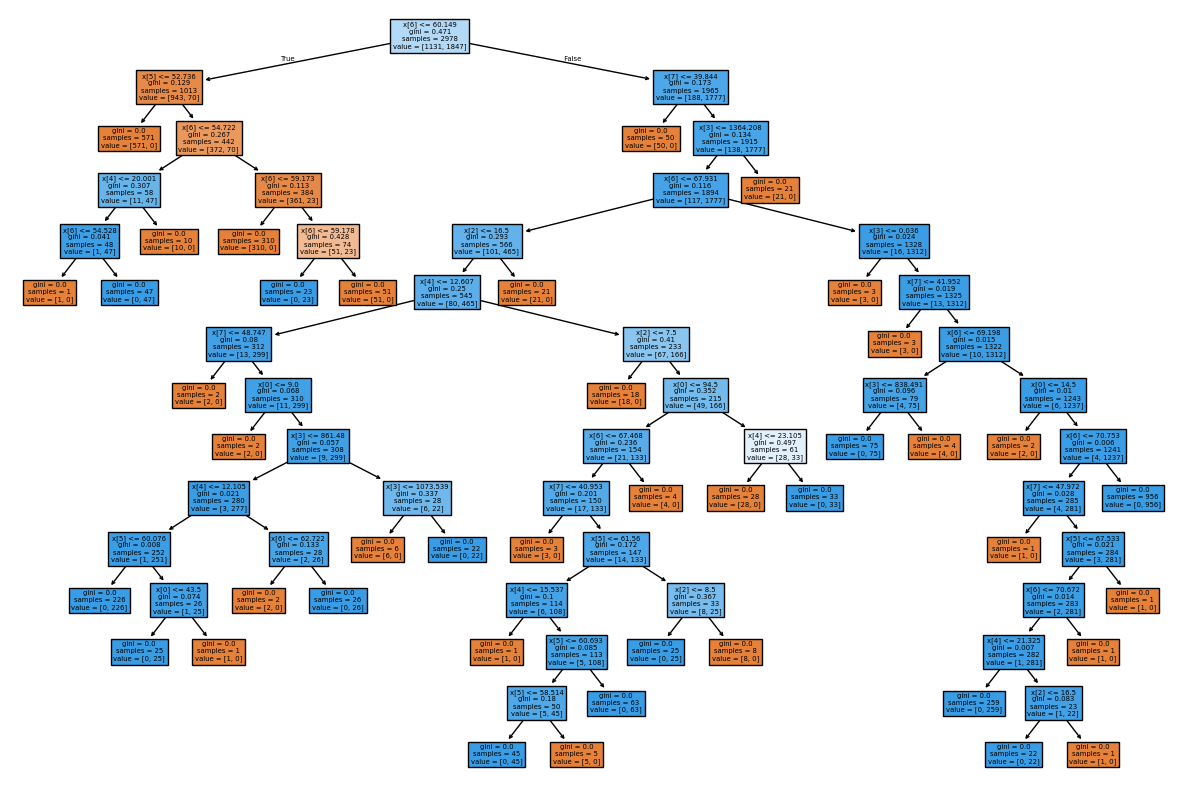

In [ ]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

### Performance Metric

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 83.55 %
-----------------------------------------------------
Confusion Matrix:
[[1539   35]
 [ 365  493]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1574
           2       0.93      0.57      0.71       858

    accuracy                           0.84      2432
   macro avg       0.87      0.78      0.80      2432
weighted avg       0.85      0.84      0.82      2432



### Hyper parameter Tuning

In [ ]:
param_grid = {'criterion' : ['gini','entropy','log_loss'],
              'splitter' : ['best','random'],
              'max_depth' : [1,2,3,4,5,6],
              'max_features' : ['auto','sqrt','log2']}

#### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,refit=True,verbose=3,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
grid_search.best_score_

np.float64(0.9593756697309797)

In [ ]:
y_pred = grid_search.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100,2),"%")
print('-----------------------------------------------------')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('-----------------------------------------------------')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.61 %
-----------------------------------------------------
Confusion Matrix:
[[1502   72]
 [ 132  726]]
-----------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1574
           2       0.91      0.85      0.88       858

    accuracy                           0.92      2432
   macro avg       0.91      0.90      0.91      2432
weighted avg       0.92      0.92      0.92      2432



## Random Forest Classifier

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

models ={'Random Forest' : RandomForestClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8586
- F1 Score: 0.8491
- Precision: 0.9724
- Recall: 0.6166
- ROC AUC Score: 0.8035




### Hyper parameter Tuning

In [ ]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [ ]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [ ]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)

                   ]

In [ ]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 15}


In [ ]:
models={

    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,
                                          max_features=5,max_depth=15)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8828
- F1 score: 0.8773
- Precision: 0.9659
- Recall: 0.6923
- Roc Auc Score: 0.8395




### ROC Curve

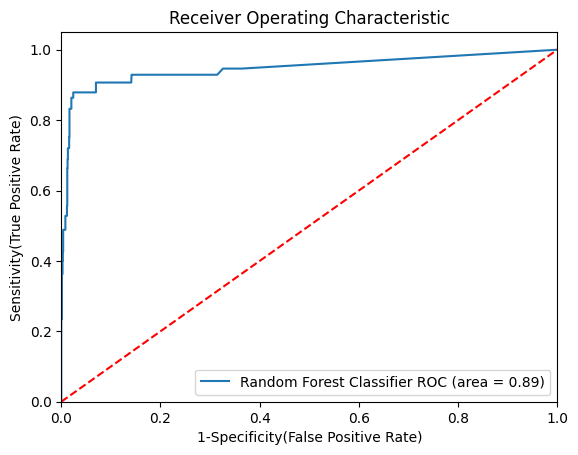

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=200,min_samples_split=2,
                                          max_features=5,max_depth=8),
    'auc':  0.8935
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],pos_label=2)
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

## AdaBoost Classifier

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

models ={'AdaBoost' : AdaBoostClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

AdaBoost
Model performance for Training set
- Accuracy: 0.9580
- F1 Score: 0.9577
- Precision: 0.9470
- Recall: 0.9875
- ROC AUC Score: 0.9487
----------------------------------
Model performance for Test set
- Accuracy: 0.9038
- F1 Score: 0.9046
- Precision: 0.8348
- Recall: 0.9068
- ROC AUC Score: 0.9045




### Hyper Parameter Tuning

In [ ]:
## Hyperparameter Training
adaboost_param={
    "n_estimators":[50,60,70,80,90],
    "algorithm":['SAMME','SAMME.R'],
    "learning_rate":[0.001,0.01,0.1,0.5,1]
}

In [ ]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90],
 'algorithm': ['SAMME', 'SAMME.R'],
 'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]}

In [ ]:
randomcv_models = [
    ("AB", AdaBoostClassifier(), adaboost_param)

                   ]

In [ ]:
randomcv_models

[('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90],
   'algorithm': ['SAMME', 'SAMME.R'],
   'learning_rate': [0.001, 0.01, 0.1, 0.5, 1]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 50 candidates, totalling 150 fits
---------------- Best Params for AB -------------------
{'n_estimators': 80, 'learning_rate': 0.01, 'algorithm': 'SAMME'}


In [ ]:
models={
    "Adaboost":AdaBoostClassifier(n_estimators=80, learning_rate=0.01,algorithm='SAMME')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Adaboost
Model performance for Training set
- Accuracy: 0.9134
- F1 score: 0.9123
- Precision: 0.9043
- Recall: 0.9621
- Roc Auc Score: 0.8979
----------------------------------
Model performance for Test set
- Accuracy: 0.8343
- F1 score: 0.8376
- Precision: 0.7066
- Recall: 0.9068
- Roc Auc Score: 0.8508




### ROC AUC Curve



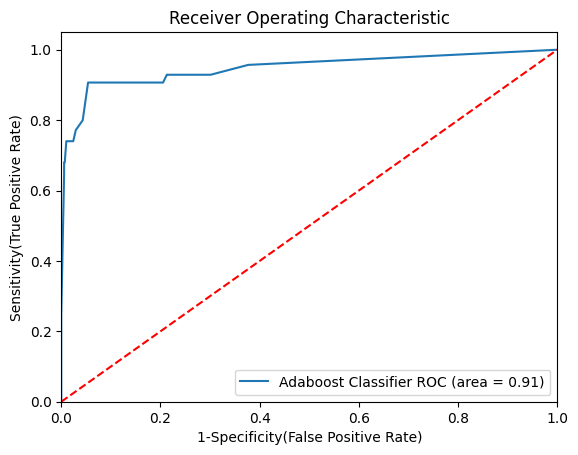

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    'model':AdaBoostClassifier(n_estimators=80, algorithm='SAMME',learning_rate=0.01),
    'auc':  0.9083
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

## Gradient Boost Classifier

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

models ={'GradientBoost' : GradientBoostingClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

GradientBoost
Model performance for Training set
- Accuracy: 0.9940
- F1 Score: 0.9939
- Precision: 0.9903
- Recall: 1.0000
- ROC AUC Score: 0.9920
----------------------------------
Model performance for Test set
- Accuracy: 0.9342
- F1 Score: 0.9336
- Precision: 0.9373
- Recall: 0.8718
- ROC AUC Score: 0.9200




### Hyperparameter Tuning

In [ ]:
## Hyperparameter Training
gradient_params={
    "loss":['log_loss','deviance','exponential'],
    "criterion" : ['friedman_mse','squared_error','mse'],
    "min_samples_split" : [2, 8, 15, 20],
    "n_estimators" : [100, 200, 500, 1000],
    "max_depth" : [5, 8, 15, None, 10]
}

In [ ]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, None, 10]}

In [ ]:
randomcv_models = [
    ("GB", GradientBoostingClassifier(), gradient_params)

                   ]

In [ ]:
randomcv_models

[('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [5, 8, 15, None, 10]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GB -------------------
{'n_estimators': 100, 'min_samples_split': 20, 'max_depth': 8, 'loss': 'exponential', 'criterion': 'squared_error'}


In [ ]:
models={
    "GradientBoost": GradientBoostingClassifier(n_estimators=100, min_samples_split=20, max_depth=8, loss='exponential', criterion='squared_error')
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

GradientBoost
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8771
- F1 score: 0.8714
- Precision: 0.9530
- Recall: 0.6853
- Roc Auc Score: 0.8334




### ROC AUC Curve

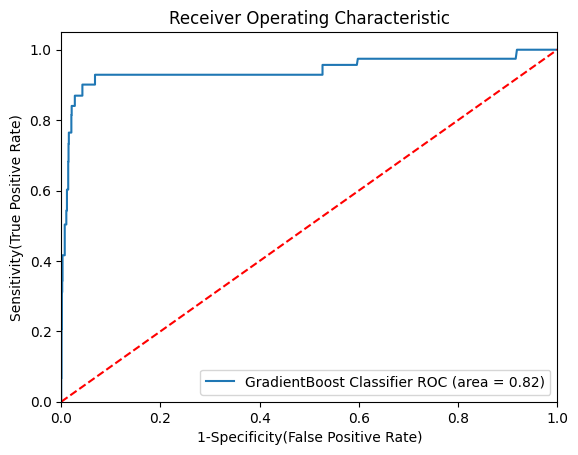

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'GradientBoost Classifier',
    'model':GradientBoostingClassifier(n_estimators=200, min_samples_split=8, max_depth=8, loss='exponential', criterion='squared_error'),
    'auc':  0.8210
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

## XGBoost Classifier

In [ ]:
!pip uninstall xgboost

Found existing installation: xgboost 0.90
Uninstalling xgboost-0.90:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/xgboost-0.90.dist-info/*
    /usr/local/lib/python3.11/dist-packages/xgboost/*
    /usr/local/xgboost/libxgboost.so
Proceed (Y/n)? Y
  Successfully uninstalled xgboost-0.90


In [ ]:
!pip install xgboost

In [ ]:
X_train = df_train[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_train = df_train['target']
X_test = df_val[['WTGID','Loc','f1','f2','f3','f4','f5','f6']]
y_test = df_val['target']

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [ ]:
# Relabel target variable for XGBoost
y_train = y_train.replace(2, 1)
y_test = y_test.replace(2, 1)

models ={'XGBoost' : XGBClassifier()}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Use relabeled training data

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Use relabeled training data for evaluation
    model_train_precision = precision_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_recall = recall_score(y_train, y_train_pred) # Use relabeled training data for evaluation
    model_train_rocauc_score = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) # Use relabeled training data for evaluation

    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Use relabeled testing data for evaluation
    model_test_precision = precision_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_recall = recall_score(y_test, y_test_pred) # Use relabeled testing data for evaluation
    model_test_rocauc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) # Use relabeled testing data for evaluation

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 Score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print('- F1 Score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))
    print('='*35)
    print('\n')

XGBoost
Model performance for Training set
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8923
- F1 Score: 0.8883
- Precision: 0.9543
- Recall: 0.7296
- ROC AUC Score: 0.9419




### Hyperparameter Tuning


In [ ]:
xgboost_params = {"learning_rate" : [0.1,0.01],
                  "max_depth": [5,8,12,20,30],
                  "n_estimators": [100,200,300],
                  "coalsample_bytree": [0.5,0.8,1.0,0.3,0.4]}

In [ ]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'coalsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4]}

In [ ]:
randomcv_models = [
    ("XGB", XGBClassifier(), xgboost_params)

                   ]

In [ ]:
randomcv_models

[('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  {'learning_rate': [0.1, 0.01],
   'max_depth': [5, 8, 12, 20, 30],
   'n_estimators': [100, 200, 300],
   'coalsample_bytree': [0.5, 0.8, 1.0, 0.3, 0.4]})]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for XGB -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.01, 'coalsample_bytree': 0.4}


In [ ]:
models={
    "XGBoost": XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.01,coalsample_bytree=0.4)}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

XGBoost
Model performance for Training set
- Accuracy: 0.9963
- F1 score: 0.9963
- Precision: 0.9941
- Recall: 1.0000
- Roc Auc Score: 0.9951
----------------------------------
Model performance for Test set
- Accuracy: 0.9120
- F1 score: 0.9098
- Precision: 0.9561
- Recall: 0.7867
- Roc Auc Score: 0.8835




### ROC AUC Curve

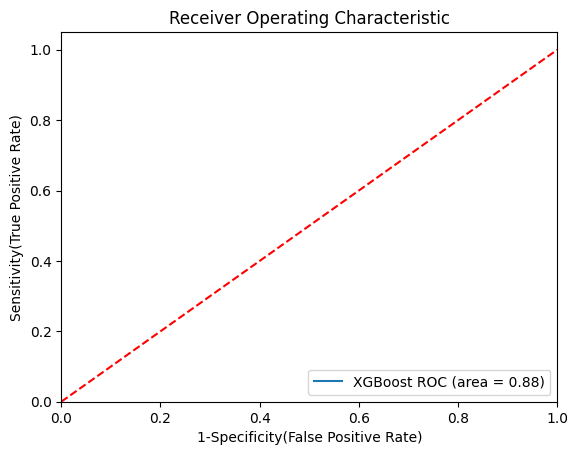

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'XGBoost',
    'model': XGBClassifier(n_estimators=300,max_depth=8,learning_rate=0.01,coalsample_bytree=0.4),
    'auc':  0.8835
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()